In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv('Mobile_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


In [4]:
df.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


<AxesSubplot:>

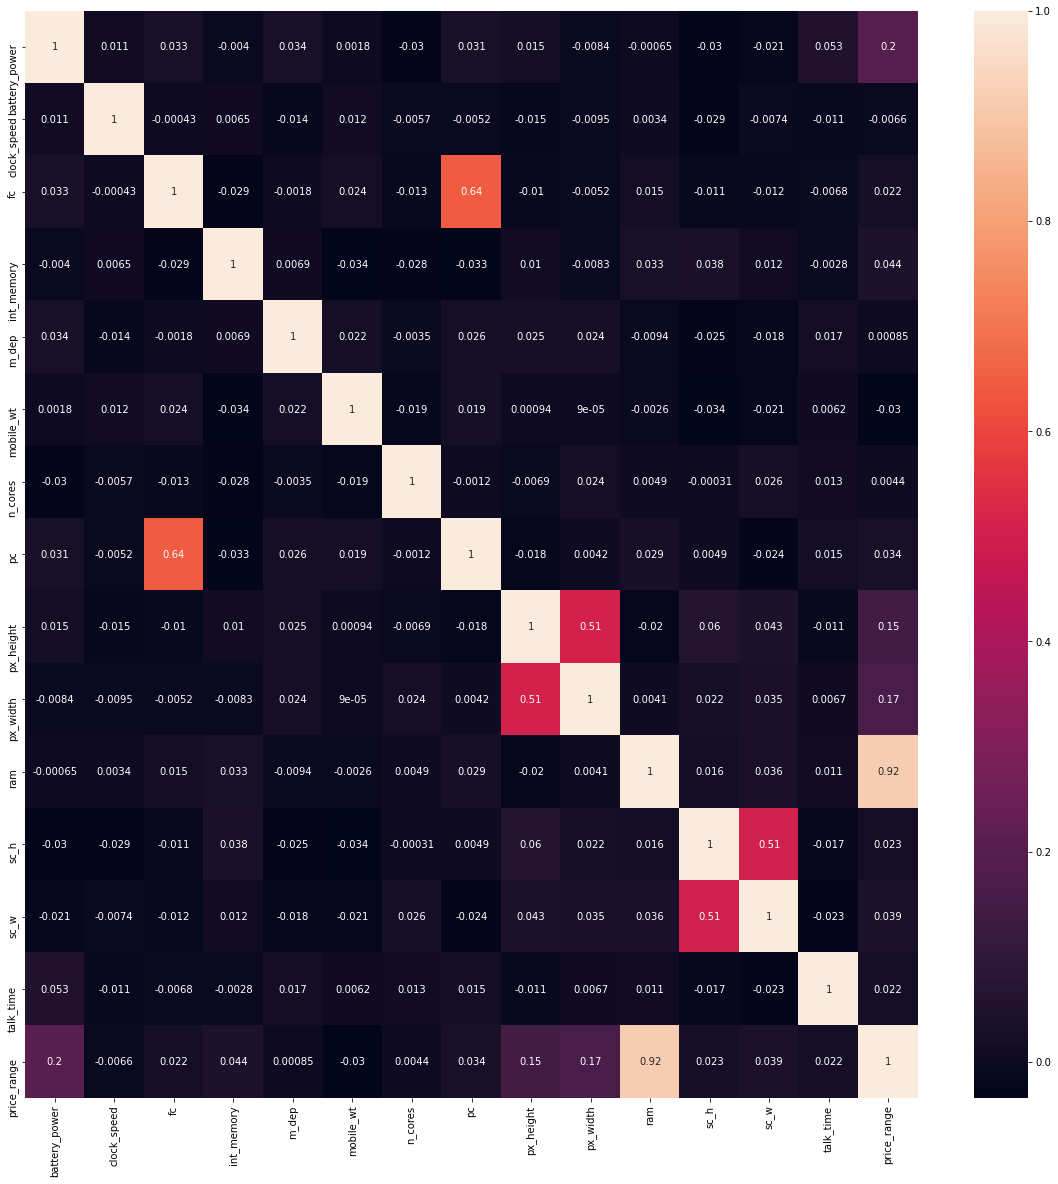

In [10]:
#PC adn FC are highly correlated, and ram seems to be the best predictor
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True)

In [58]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.518500,439.418206,501.0,851.75,1226.0,1615.25,1998.000000
clock_speed,2000.0,1.522250,0.816004,0.5,0.70,1.5,2.20,3.000000
fc,2000.0,4.276425,4.249533,0.0,1.00,3.0,7.00,15.163109
int_memory,2000.0,32.046500,18.145715,2.0,16.00,32.0,48.00,64.000000
m_dep,2000.0,0.501750,0.288416,0.1,0.20,0.5,0.80,1.000000
mobile_wt,2000.0,140.249000,35.399655,80.0,109.00,141.0,170.00,200.000000
n_cores,2000.0,4.520500,2.287837,1.0,3.00,4.0,7.00,8.000000
pc,2000.0,9.916500,6.064315,0.0,5.00,10.0,15.00,20.000000
px_height,2000.0,645.108000,443.780811,0.0,282.75,564.0,947.25,1960.000000
px_width,2000.0,1251.515500,432.199447,500.0,874.75,1247.0,1633.00,1998.000000


In [65]:
for cols in df.columns:
    print(cols , df[df[cols] > df[cols].mean() + df[cols].std() * 2.5].count().max())

battery_power 0
clock_speed 0
fc 65
int_memory 0
m_dep 0
mobile_wt 0
n_cores 0
pc 0
px_height 29
px_width 0
ram 0
sc_h 0
sc_w 27
talk_time 0
price_range 0


<AxesSubplot:xlabel='fc', ylabel='Count'>

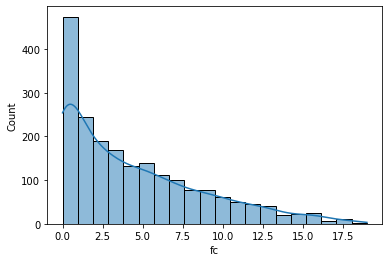

In [54]:
#Outliers are only at the upper end so no need to lower clip
sns.histplot(x = 'fc', data = df, kde = True)

In [55]:
df['fc'] = df['fc'].clip(upper = df['fc'].mean() + df['fc'].std()* 2.5)

<AxesSubplot:xlabel='px_height', ylabel='Count'>

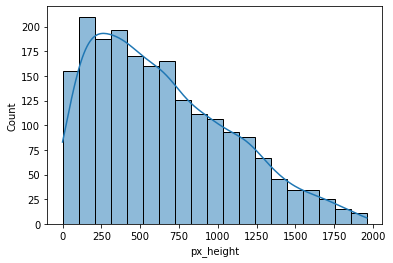

In [59]:
#No need to lower clip because outliers are the the upper end
sns.histplot(x = 'px_height', data = df, kde = True)

In [60]:
df['px_height'] = df['px_height'].clip(upper = df['px_height'].mean() + df['px_height'].std()* 2.5)

<AxesSubplot:xlabel='sc_w', ylabel='Count'>

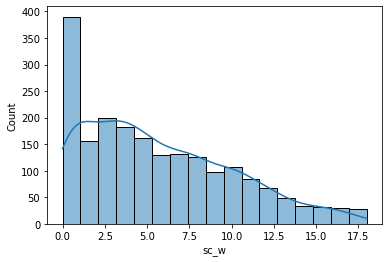

In [62]:
#No need to lower clip because outliers are the the upper end
sns.histplot(x = 'sc_w', data = df, kde = True)

In [63]:
df['sc_w'] = df['sc_w'].clip(upper = df['sc_w'].mean() + df['sc_w'].std()* 2.5)

#### Model selection

In [66]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [112]:
classifier = KNeighborsClassifier(metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [113]:
y_pred_knn = classifier.predict(X_test)

In [114]:
metrics.confusion_matrix(y_test, y_pred_knn)

array([[ 92,   3,   0,   0],
       [  4,  85,   3,   0],
       [  0,   6,  86,   7],
       [  0,   0,   6, 108]], dtype=int64)

In [115]:
print("R2Score =", metrics.r2_score(y_test, y_pred_knn))
print("Accuracy =", metrics.accuracy_score(y_test, y_pred_knn))

R2Score = 0.9437373894148688
Accuracy = 0.9275


In [116]:
print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        95
           1       0.90      0.92      0.91        92
           2       0.91      0.87      0.89        99
           3       0.94      0.95      0.94       114

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



In [117]:
#KNeighborsClassifier?

Minimum error:- 0.0425 at K = 17


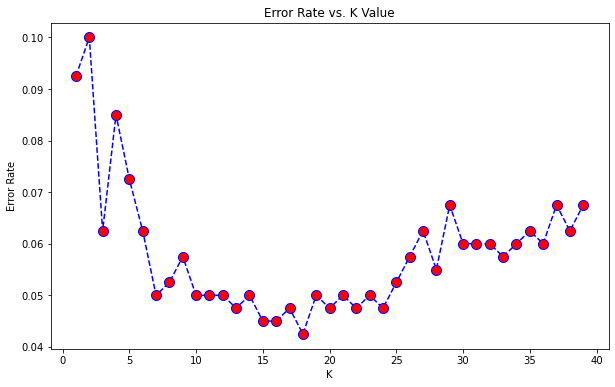

In [118]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [119]:
classifier = KNeighborsClassifier(n_neighbors = 17, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [120]:
y_pred_knn = classifier.predict(X_test)

In [121]:
metrics.confusion_matrix(y_test, y_pred_knn)

array([[ 94,   1,   0,   0],
       [  3,  89,   0,   0],
       [  0,   4,  89,   6],
       [  0,   0,   5, 109]], dtype=int64)

In [122]:
print("R2Score =", metrics.r2_score(y_test, y_pred_knn))
print("Accuracy =", metrics.accuracy_score(y_test, y_pred_knn))


R2Score = 0.9631382896166382
Accuracy = 0.9525


In [123]:
print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        95
           1       0.95      0.97      0.96        92
           2       0.95      0.90      0.92        99
           3       0.95      0.96      0.95       114

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400

